### TASK 2 

#### Loading cleaned dataset using method chaining

In [1]:
import sys
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../')

from scripts import project_functions # This is called a relative import
df = project_functions.load_and_process("../../data/raw/Vancouver.csv")
df

,Num_Baths,Airbnb_Id,Neighbourhood,Host_ResponseTime,Superhost,Property_Type,Room_Type,Num_Baths_Detailed,Num_Bedrooms,Num_Beds,Amenities,Price_per_Night,Availablility_365Days,Minimum_Nights,Num_Reviews,Accuray_ReviewScore,Cleanliness_ReviewScore,Communication_ReviewScore,Value_ReviewScore,Num_Host_Listings
0,2,10080,Downtown,within an hour,False,Entire condominium,Entire home/apt,2 baths,2.0,2.0,462,150.0,346,90,16,9.0,9.0,9.0,9.0,40
1,1,13358,West End,within a day,True,Entire condominium,Entire home/apt,1 bath,1.0,1.0,520,85.0,98,30,430,9.0,10.0,10.0,9.0,1
2,1,13490,Kensington-Cedar Cottage,within an hour,True,Entire apartment,Entire home/apt,1 bath,1.0,1.0,914,145.0,203,30,88,10.0,10.0,10.0,10.0,1
3,1,14267,Kensington-Cedar Cottage,within a few hours,False,Entire house,Entire home/apt,1 bath,1.0,2.0,421,140.0,123,3,33,10.0,9.0,9.0,9.0,1
4,1,16611,Grandview-Woodland,a few days or more,False,Entire house,Entire home/apt,1 bath,3.0,4.0,334,100.0,89,30,3,8.0,6.0,9.0,7.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,1,48760992,Killarney,within an hour,False,Entire house,Entire home/apt,1 bath,1.0,2.0,750,58.0,317,7,2,7.0,10.0,8.0,10.0,2
2210,1,48807222,Downtown,within an hour,False,Entire apartment,Entire home/apt,1 bath,1.0,2.0,581,140.0,83,1,1,10.0,10.0,10.0,10.0,1
2211,1,48887284,Downtown Eastside,within an hour,False,Entire condominium,Entire home/apt,1 bath,1.0,2.0,658,117.0,260,2,2,10.0,10.0,10.0,10.0,1
2212,1,48945174,Mount Pleasant,within an hour,False,Entire house,Entire home/apt,1 bath,1.0,1.0,863,85.0,58,2,1,10.0,10.0,10.0,10.0,1


### TASK 3 & 4

#### EDA & Analysis through visualizations 

Text(0.5, 1.0, 'Heatmap of Airbnb Data')

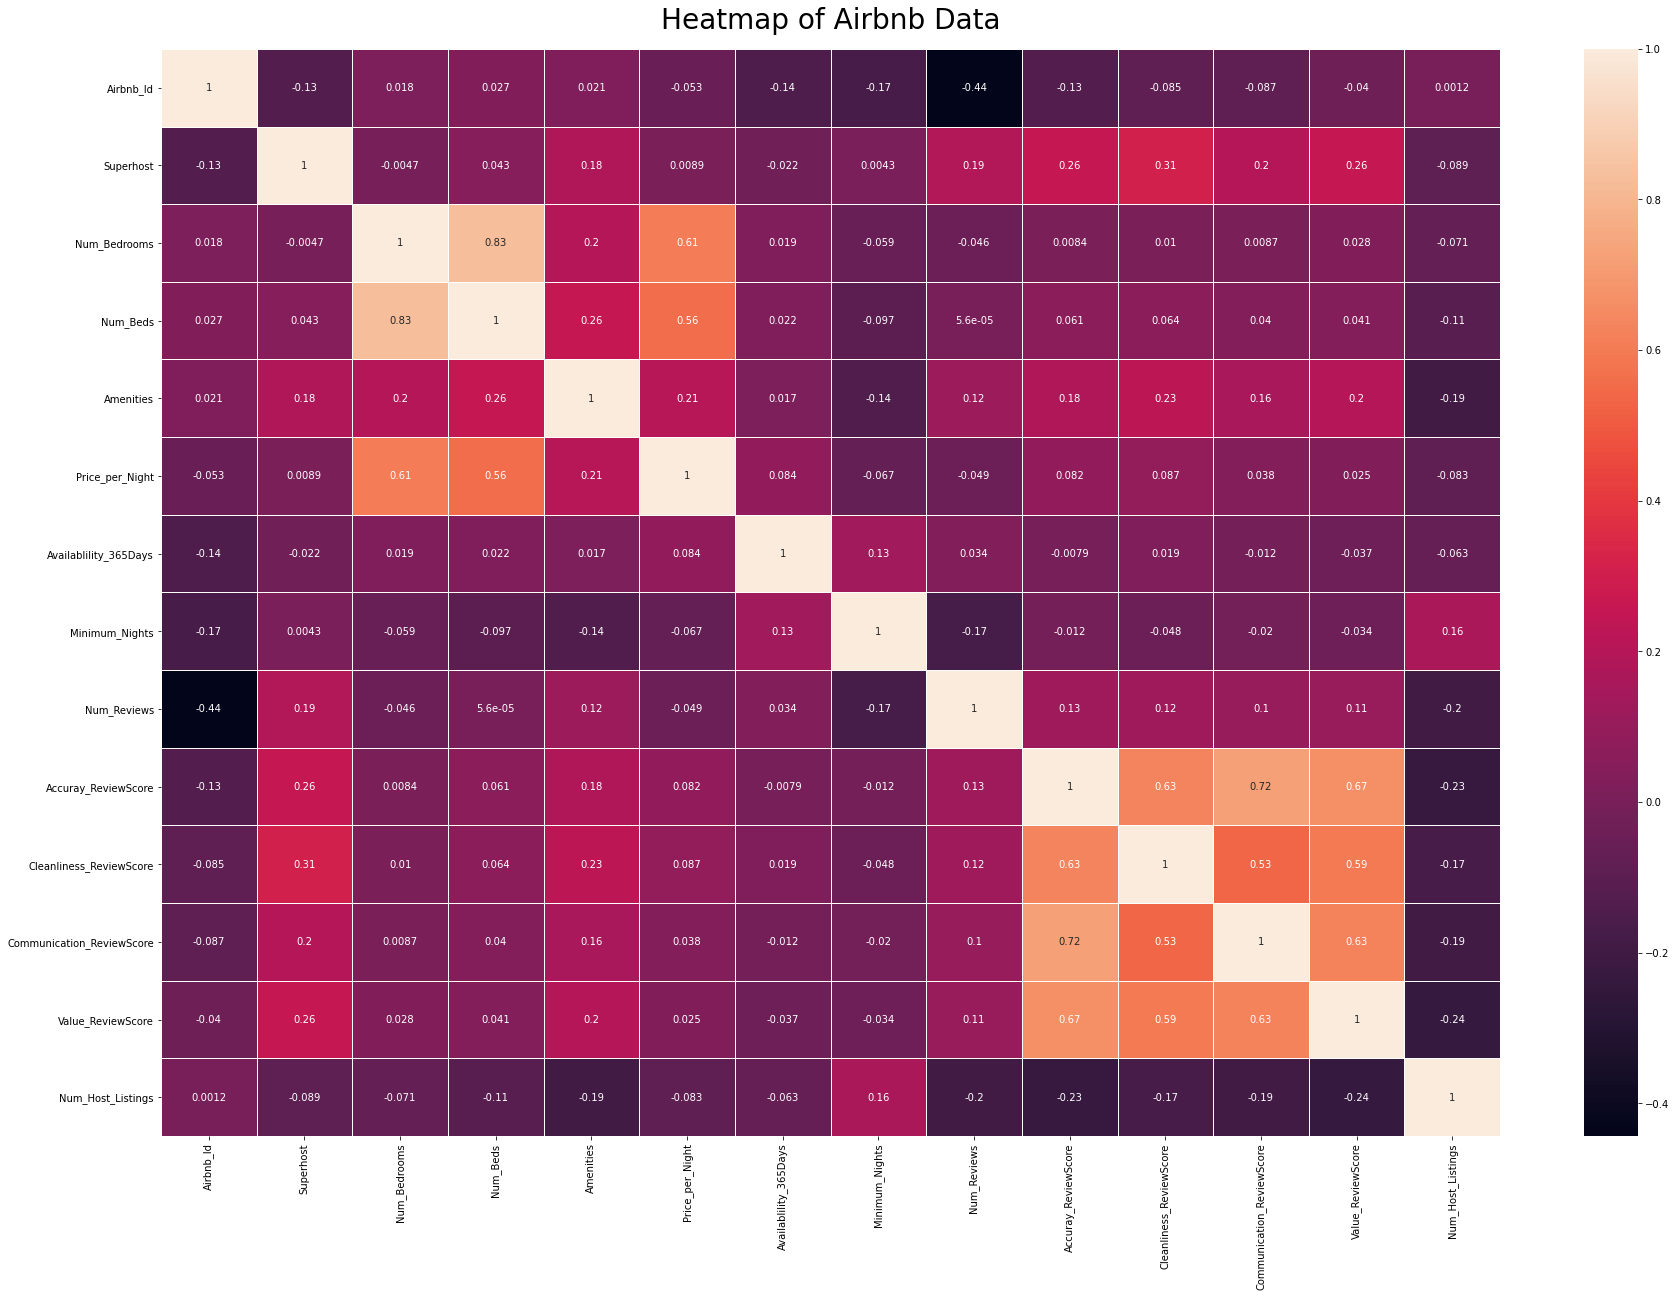

In [7]:
# EDA

# Trying to understand meta-information about my data

df.shape

df.head()

# I checked the statistical data for all the columns and nothing stands out as mistyping or an error, data seems clean
df.describe()

# Just trying to understand how many different unique neighbourhoods and response times can be for further analyisis later
len(df.Neighbourhood.unique())

len(df.Amenities.unique())

df.Host_ResponseTime.unique()

df.columns

# Plotting a correlation plot to see relation between all the different variables
f, ax = plt.subplots()
plt.rcParams['figure.figsize']=(30,15)

corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.5).set_title("Heatmap of Airbnb Data", fontsize="28", pad="20")

Interestingly the number of beds, bedrooms and amenities have a **high correlation** with the price of Airbnbs, which seems obvious, since more beds or bedrooms usually mean it might be the whole apartment or a house, and entire places are ususally more expensive to book.

But I suspect there are more factors that could lead to a fluctuation in the price, these might include being a superhost, a good locality, minimum nights allowed, and the property type. This will require digging deeper to look into indivisual vairables. 


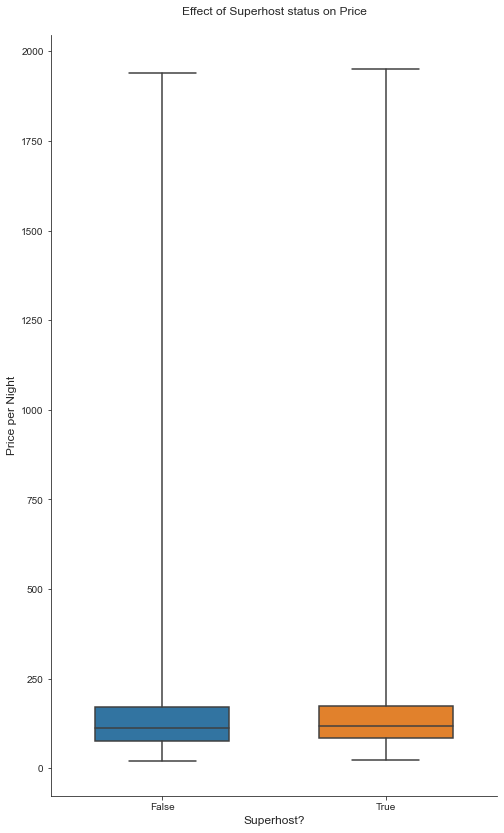

In [31]:
# Checking the Price per night fluctuation for different types of host 
sns.set_style("ticks")

f, ax = plt.subplots()
plt.rcParams['figure.figsize']=(14,14)

sns.boxplot(x="Superhost", y="Price_per_Night", data=df, whis=[0, 100], width=.6).set_title("Effect of Superhost status on Price", fontsize="12", pad="20")

ax.set_xlabel("Superhost?", fontsize="12")
ax.set_ylabel("Price per Night", fontsize="12")

sns.despine()

Hmmm weirdly enough after counting the values of superhosts vs the normal hosts and checking stats it seems
they have almost *similar* values, so I guess that can be crossed out as a factor that affects the prices of Airbnbs

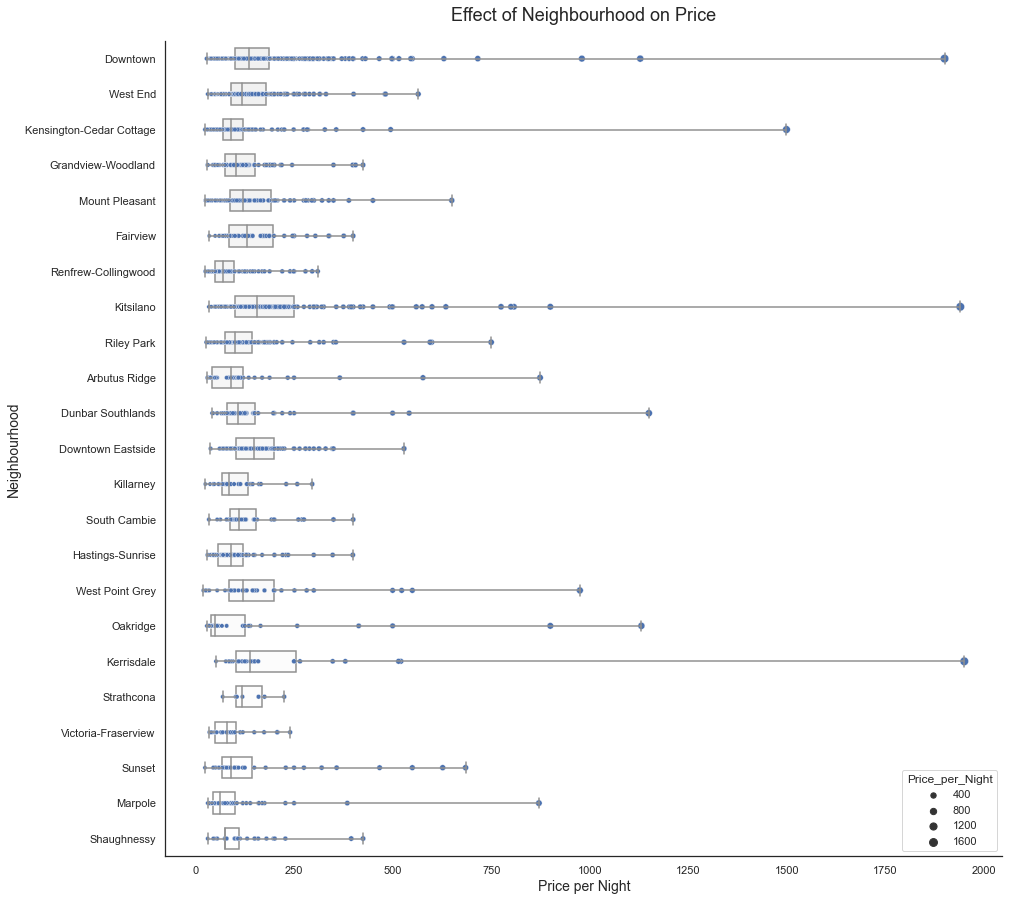

In [46]:
# Checking for different locations in Vancouver reveals there might be a slight relation between prices and locations
# All of them have their medians and IQR fall close to the same price range besides certain ones like Kitsilano, Kerrisdale
# and downtown which seem further up in price and their max is heigher too
# 

import pandas as pd

sns.set(rc={'figure.figsize':(15,15)})
sns.set_style("white")

f, ax = plt.subplots()
plt.rcParams['figure.figsize']=(14,14)

sns.boxplot(y="Neighbourhood", x="Price_per_Night", data=df, whis=[0, 100], width=.6, palette="light:#fff").set_title("Effect of Neighbourhood on Price", fontsize="18", pad="20")
sns.scatterplot(y="Neighbourhood", x="Price_per_Night", data=df, size="Price_per_Night")

ax.set_xlabel("Price per Night", fontsize="14")
ax.set_ylabel("Neighbourhood", fontsize="14")

sns.despine()
sns.set_theme(font_scale=1.1)

The range of values for boxplots might need to decreased like prices between 0 and 500, to reveal a better correlation visual. 
Since right now the outliers give effect of no correlation as they stretch the box plots

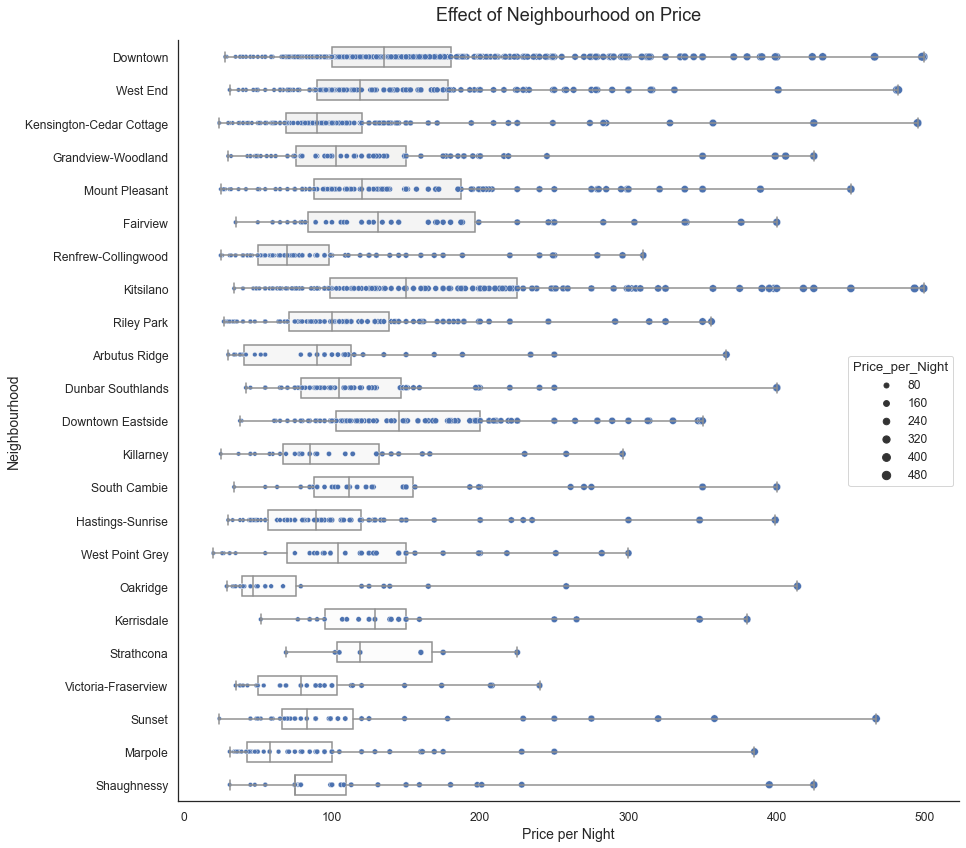

In [47]:
df2 = df.loc[lambda row: row["Price_per_Night"] < 500]
pd.DataFrame(df2).reset_index()

sns.set_style("white")
f, ax = plt.subplots()
plt.rcParams['figure.figsize']=(14,14)

sns.boxplot(y="Neighbourhood", x="Price_per_Night", data=df2, whis=[0, 100], width=.6, palette="light:#fff").set_title("Effect of Neighbourhood on Price", fontsize="18", pad="20")
sns.scatterplot(y="Neighbourhood", x="Price_per_Night", data=df2, size="Price_per_Night")

ax.set_xlabel("Price per Night", fontsize="14")
ax.set_ylabel("Neighbourhood", fontsize="14")

sns.despine()
sns.set_theme(font_scale=1.1)

This is much better now, I can see the boxplots much more clearly with greater distinction between prices based on location.
The same relation holds true, where places closer to downtown are expensive and also have more bookings

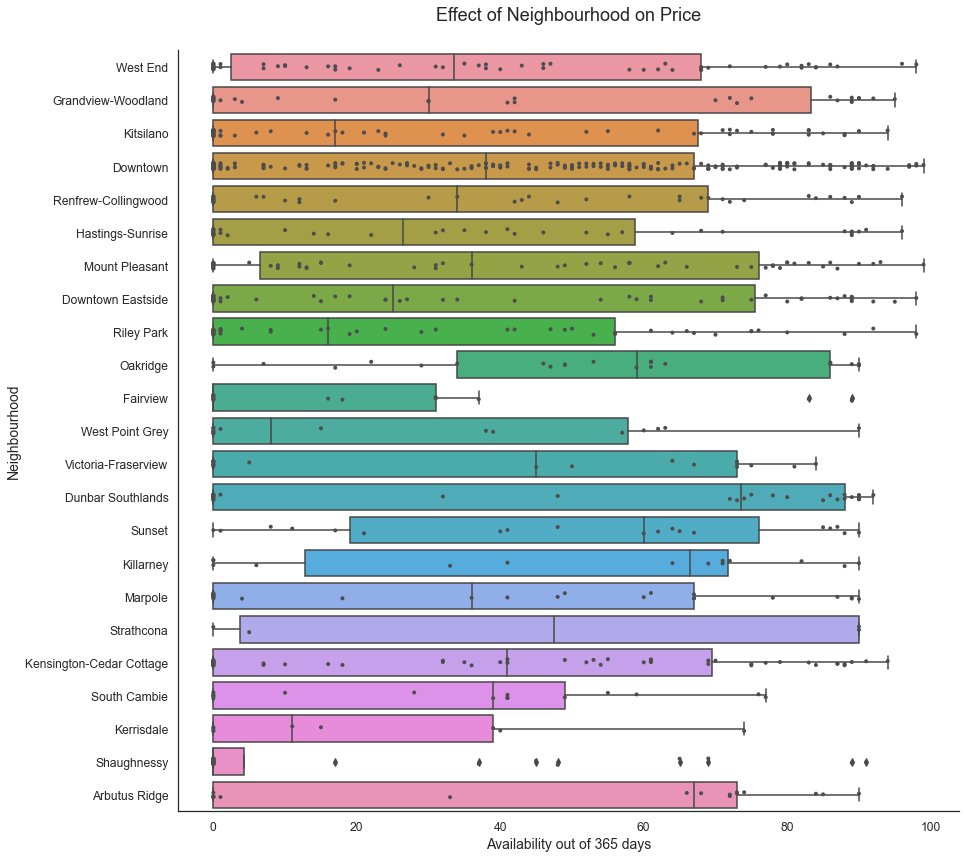

In [52]:
# While fidling with graphs above, I uncovered another important relation from my data about the popularity of Airbnb with location

df2 = df[["Neighbourhood","Availablility_365Days"]].loc[lambda row: row["Availablility_365Days"] < 100]

sns.set_style("white")
f, ax = plt.subplots()

sns.boxplot(y=df2["Neighbourhood"], x=df2["Availablility_365Days"], data=df2)

# Add in points to show each observation
sns.stripplot(x=df2["Availablility_365Days"], y=df2["Neighbourhood"], data=df2, size=4, color=".3", linewidth=0).set_title("Effect of Neighbourhood on Price", fontsize="18", pad="30")

ax.set_xlabel("Availability out of 365 days", fontsize="14")
ax.set_ylabel("Neighbourhood", fontsize="14")

sns.despine()
sns.set_theme(font_scale=1.1)

In [67]:
print(df2["Neighbourhood"].value_counts())

Downtown                    259
Kitsilano                    67
West End                     62
Mount Pleasant               59
Downtown Eastside            56
Kensington-Cedar Cottage     55
Riley Park                   51
Renfrew-Collingwood          41
Hastings-Sunrise             40
Grandview-Woodland           34
Dunbar Southlands            32
Shaughnessy                  32
Marpole                      27
Oakridge                     25
Victoria-Fraserview          19
Sunset                       19
Arbutus Ridge                18
South Cambie                 17
West Point Grey              16
Fairview                     15
Killarney                    14
Kerrisdale                    9
Strathcona                    4
Name: Neighbourhood, dtype: int64


We can see that for Airbnbs with almost similar value counts, such as Kistilano and West End, have different medians when it comes to availability per 365 days. Kistilano has a much higher booking rate as its available less days an year compared to West End. This same trend can be seen with Downtown Eastside vs Mountain Pleasant, where Downtown East side being the heart of the city is booked way more than the latter. 

On a much larger scale, it can be seen that Airbnbs closer to **Downtown** are booked way more than Airbnbs further away from DT. 
This can also imply there might be more Airbnb's near downtown than the rest of Vancouver where there might be less short term rentals

Text(0, 0.5, 'Neighbourhood')

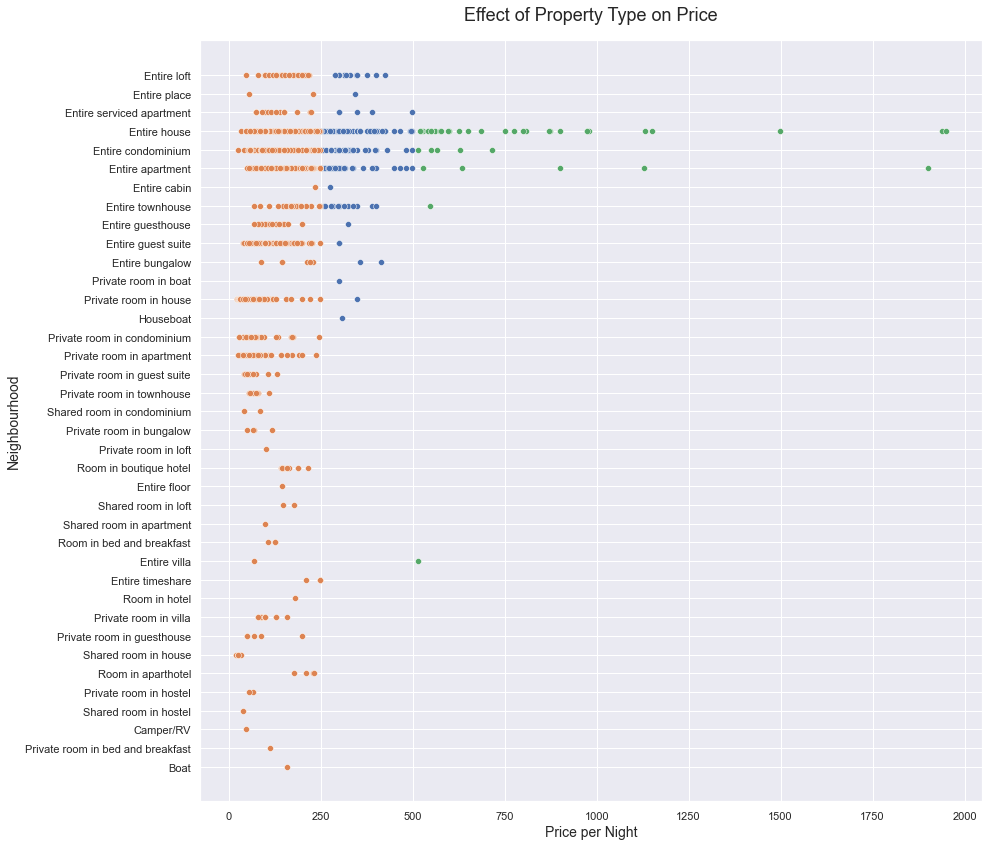

In [72]:
# Now lets try to see if there is a relationship between price of Airbnbs and types of places 

# For Airbnbs with prices in range of $250 and $500
df3 = df[(df["Price_per_Night"] > 250) & (df["Price_per_Night"] < 500)]

# For Airbnbs with prices less than $250
df4 = df.loc[lambda row: row["Price_per_Night"] < 250 ]

# For Airbnbs with prices greater than $500
df5 = df.loc[lambda row: row["Price_per_Night"] > 500]

pd.DataFrame(df3).reset_index()
pd.DataFrame(df4).reset_index()
pd.DataFrame(df5).reset_index()

f, ax = plt.subplots()
sns.set_theme()

sns.scatterplot(y="Property_Type", x="Price_per_Night", data=df3).set_title("Effect of Property Type on Price", fontsize="18", pad="20")
sns.scatterplot(y="Property_Type", x="Price_per_Night", data=df4)
sns.scatterplot(y="Property_Type", x="Price_per_Night", data=df5)

ax.set_xlabel("Price per Night", fontsize="14")
ax.set_ylabel("Neighbourhood", fontsize="14")

Plotting three scatterplots for various price points, we see that certain properties have much higher price ranges than others
These include **Entire houses, Entire condos, Entire aprtments, usually entire properties**. This makes sense since most people including msyelf prefer privacy and are willing to pay extra price if the difference isn't that much. Also its more convinient for tourists who usually come with families and friends and would like to have the place to themselves. This gives Airbnbs owners leverage to offer a higher price too. But naturally an entire place would cost more because of the number of beds/bedrooms and amenities.

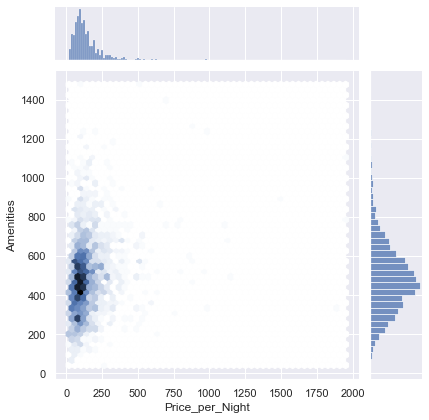

In [73]:
# Comparison between prices of Airbnbs and the number of Amenities available

sns.jointplot(data=df, x="Price_per_Night", y="Amenities", kind="hex").set_title("Effect of Property Type on Price", fontsize="18", pad="20")

At first glance we can see that most of the prices lie in the range of 0 to 500 with some outliers, so lets try to capture only that range so we get a better scaled graph. Also lets try to to constrain amenities to a value of 700 to get a better look at the trend.

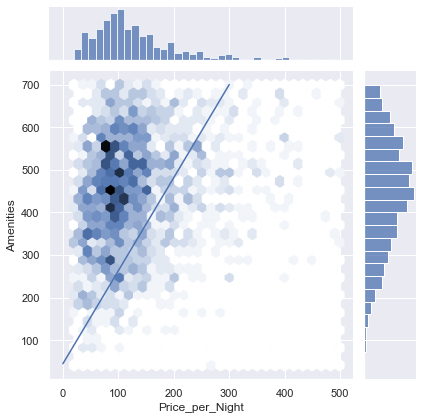

In [74]:
# For Airbnbs with prices greater than $500

rangedDf = df[(df["Price_per_Night"] < 500) & (df["Amenities"] < 700)]

# Now lets plot this range

sns.jointplot(data=rangedDf, x="Price_per_Night", y="Amenities", kind="hex")
plt.plot([0, 300], [44.5, 700], linewidth=1.5)

We can see here that for Airbnbs with less amenities, the occurance of an Airbnb with a higher price is very low compared to Airbnbs with more Amenities. From the line
drawn across the diagonal at a price range of 0 to 300, we can see that on the right side that as amenities increase, we see more occurances of higher priced Airbnbs. 